Text(0.5, 1.0, 'Average value in lesion')

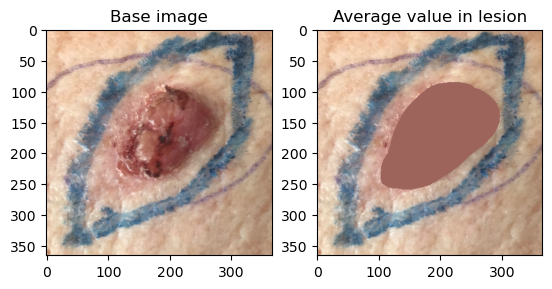

In [31]:
from skimage import segmentation, color
import matplotlib.pyplot as plt
import numpy as np

#1
rgb_img = plt.imread("PAT_122_185_957.png")[:,:,:3]
mask = plt.imread("PAT_122_185_957_mask.png")

img_avg_lesion = rgb_img.copy()
for i in range(3):
    channel = img_avg_lesion[:,:,i]
    mean = np.mean(channel[mask.astype(bool)])
    channel[mask.astype(bool)] = mean
    img_avg_lesion[:,:,i] = channel

fig = plt.figure()
fig.add_subplot(121)
plt.imshow(rgb_img)
plt.title("Base image")
fig.add_subplot(122)
plt.imshow(img_avg_lesion)
plt.title("Average value in lesion")

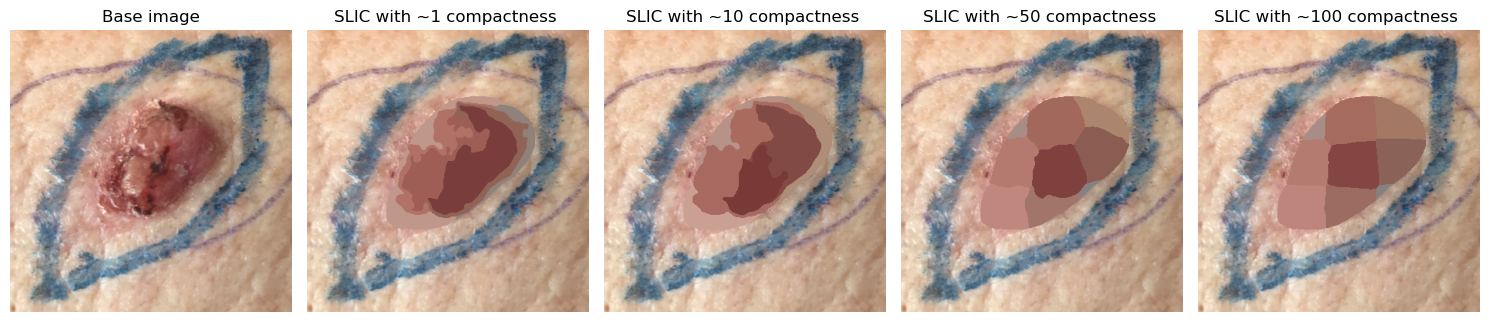

In [32]:
# Find coordinates of the lesion in the mask
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x, min_y:max_y]

lst_compactness = [1, 10, 50, 100]
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, len(lst_compactness) + 1, 1)
plt.axis("off")
plt.title(f"Base image")
plt.imshow(rgb_img)

img_avg_lesion = rgb_img.copy()
for i, c in enumerate(lst_compactness, 1):
    labels1 = segmentation.slic(cropped_lesion, compactness=c, n_segments=10, sigma=3,
                                start_label=1)
    out1 = color.label2rgb(labels1, cropped_lesion, kind='avg', bg_label=0)
    img_avg_lesion[min_x:max_x, min_y:max_y] = out1
    img_avg_lesion[mask == 0] = rgb_img[mask == 0]
    fig.add_subplot(1, len(lst_compactness) + 1, i + 1)
    plt.axis("off")
    plt.title(f"SLIC with ~{c} compactness ")
    plt.imshow(img_avg_lesion)
fig.tight_layout()
plt.show()


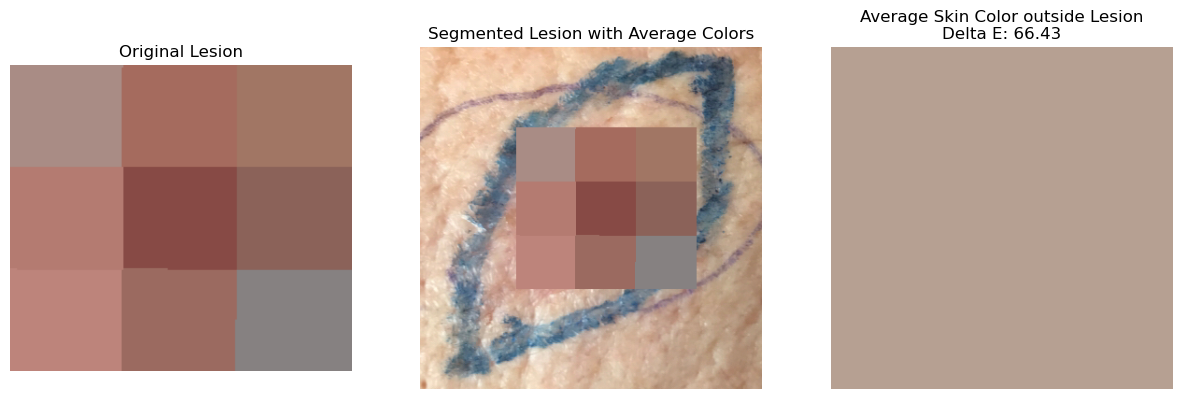

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from sklearn.metrics import euclidean_distances

# Load the image and its corresponding mask
image_path = 'PAT_122_185_957.png'
mask_path = 'PAT_122_185_957_mask.png'

image = Image.open(image_path)
mask = Image.open(mask_path).convert('L')

# Convert PIL image to numpy array
rgb_img = np.array(image)
mask = np.array(mask)

# Find coordinates of the lesion in the mask
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x, min_y:max_y]

# Perform SLIC superpixel segmentation
labels1 = segmentation.slic(cropped_lesion, compactness=10, n_segments=10, sigma=3,
                            start_label=1)

# Calculate average color for each segment
segment_colors = []
for label in np.unique(labels1):
    if label == 0:
        continue
    mask_label = labels1 == label
    avg_color = np.mean(cropped_lesion[mask_label], axis=0)
    segment_colors.append(avg_color)

# Assign average colors back to the lesion area in the original image
for label, color in zip(np.unique(labels1), segment_colors):
    if label == 0:
        continue
    mask_label = labels1 == label
    rgb_img[min_x:max_x, min_y:max_y][mask_label] = color

# Calculate average color for the areas outside the lesion
skin_color = np.mean(rgb_img[mask == 0], axis=0)

# Calculate Delta E between average skin color and average lesion color
delta_e = np.linalg.norm(skin_color - np.mean(cropped_lesion, axis=(0, 1)))

# Display the results
plt.figure(figsize=(15, 10))

# Plot the original lesion
plt.subplot(1, 3, 1)
plt.imshow(cropped_lesion)
plt.title('Original Lesion')
plt.axis('off')

# Plot the segmented lesion with average colors
plt.subplot(1, 3, 2)
plt.imshow(rgb_img)
plt.title('Segmented Lesion with Average Colors')
plt.axis('off')

# Plot the average skin color outside the lesion
plt.subplot(1, 3, 3)
plt.imshow([[[int(channel) for channel in skin_color]]])  # Create a single-pixel image with the average skin color
plt.title(f'Average Skin Color outside Lesion\nDelta E: {delta_e:.2f}')
plt.axis('off')

plt.show()


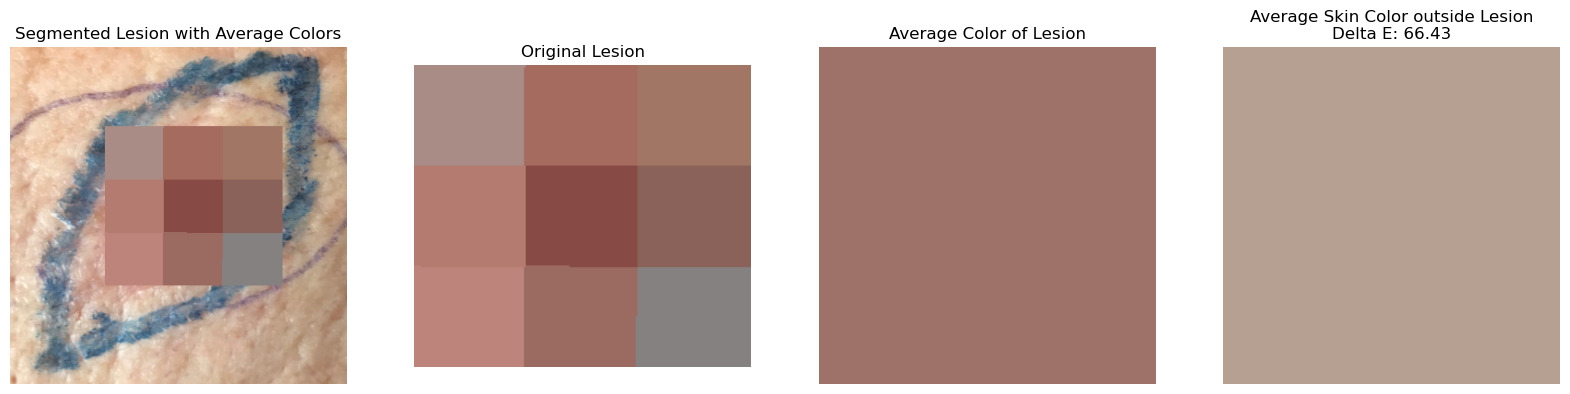

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from sklearn.metrics import euclidean_distances

# Load the image and its corresponding mask
image_path = 'PAT_122_185_957.png'
mask_path = 'PAT_122_185_957_mask.png'

image = Image.open(image_path)
mask = Image.open(mask_path).convert('L')

# Convert PIL image to numpy array
rgb_img = np.array(image)
mask = np.array(mask)

# Find coordinates of the lesion in the mask
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x, min_y:max_y]

# Perform SLIC superpixel segmentation
labels1 = segmentation.slic(cropped_lesion, compactness=10, n_segments=10, sigma=3,
                            start_label=1)

# Calculate average color for each segment
segment_colors = []
for label in np.unique(labels1):
    if label == 0:
        continue
    mask_label = labels1 == label
    avg_color = np.mean(cropped_lesion[mask_label], axis=0)
    segment_colors.append(avg_color)

# Assign average colors back to the lesion area in the original image
for label, color in zip(np.unique(labels1), segment_colors):
    if label == 0:
        continue
    mask_label = labels1 == label
    rgb_img[min_x:max_x, min_y:max_y][mask_label] = color

# Calculate average color for the areas outside the lesion
skin_color = np.mean(rgb_img[mask == 0], axis=0)

# Calculate Delta E between average skin color and average lesion color
delta_e = np.linalg.norm(skin_color - np.mean(cropped_lesion, axis=(0, 1)))

# Calculate average color of all colors in the lesion
avg_lesion_color = np.mean(cropped_lesion, axis=(0, 1))

# Display the results
plt.figure(figsize=(20, 10))

# Plot the segmented lesion with average colors
plt.subplot(1, 4, 1)
plt.imshow(rgb_img)
plt.title('Segmented Lesion with Average Colors')
plt.axis('off')

# Plot the original lesion
plt.subplot(1, 4, 2)
plt.imshow(cropped_lesion)
plt.title('Original Lesion')
plt.axis('off')

# Plot the average color of all colors in the lesion
plt.subplot(1, 4, 3)
plt.imshow([[[int(channel) for channel in avg_lesion_color]]])  # Create a single-pixel image with the average lesion color
plt.title('Average Color of Lesion')
plt.axis('off')

# Plot the average skin color outside the lesion
plt.subplot(1, 4, 4)
plt.imshow([[[int(channel) for channel in skin_color]]])  # Create a single-pixel image with the average skin color
plt.title(f'Average Skin Color outside Lesion\nDelta E: {delta_e:.2f}')
plt.axis('off')



plt.show()
